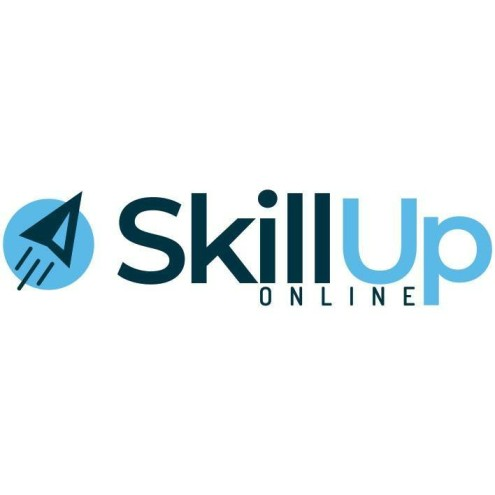

# **Detección de fraudes con tarjetas de crédito**

Enlace al dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

### Importa las bibliotecas necesarias

In [1]:
# Importa la bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
ls

 El volumen de la unidad C no tiene etiqueta.
 El n�mero de serie del volumen es: 2A12-8C45

 Directorio de c:\Users\fjjna\IBM\IA\Proyectos\Machine-Learning\deteccion-fraudes-tarjetas\notebook

08/11/2024  13:08    <DIR>          .
08/11/2024  13:08    <DIR>          ..
08/11/2024  13:09           222.457 deteccion-fraudes-tarjetas.ipynb
               1 archivos        222.457 bytes
               2 dirs  735.378.759.680 bytes libres


### Importa y organiza el dataset

In [4]:
# Organizar los datos en un dataframe
# Importamos os para comprobar si el fichero csv existe en el directorio de trabajo

import os
current_path = os.getcwd()
file_csv="../data/creditcard.csv"

if os.path.isfile(file_csv):
    df_credit=pd.read_csv(file_csv)
    print(df_credit.head(10))
    
else:
    print(f"El archivo {file_csv} no existe en el directorio de trabajo.")
    print(f"Asegurese de que esté en la siguiente ruta: {current_path}")


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6   4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7   7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8   7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9   9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -


<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Comienza por importar la biblioteca de pandas: import pandas as pd.
    
Utiliza la función read_csv() para cargar el archivo CSV en un dataframe de pandas. Especifica la ruta en los paréntesis, por ejemplo: pd.read_csv("ruta_al_archivo.csv").
    
Asigna al dataframe resultante al nombre de una variable, por ejemplo: data = pd.read_csv("ruta_al_archivo.csv").
    
Utiliza el método head() sobre el dataframe para mostrar las primeras 10 filas, por ejemplo: data.head(10).
    
Asegúrate de reemplazar "ruta_al_archivo.csv" con la ruta real a tu archivo y el nombre de tu archivo CSV..

```



</details>

### Limpia los datos

a. Valores perdidos

In [5]:
#Escribe tu código aquí
#Contamos todos los nulos que me llegan en el dataframe
all_null=df_credit.isnull().sum().sum()
print("Total de nulos en el dataframe:", all_null)

#En caso de que haya algún nulo, creamos el df booleano
if all_null > 0:
    df_credit_all_null=df_credit.isnull()
    print("df_credit_null es el dataframe con los valores nulos creado (dataframe booleano)")
    print(df_credit_all_null)
else:
    print("No hay valores nulos en todo el dataframe")


Total de nulos en el dataframe: 0
No hay valores nulos en todo el dataframe


<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```

Utiliza el nombre de la variable del dataframe seguido del método isnull() para crear un dataframe booleano donde «verdadero» indique un valor nulo y «falso» indique un valor no nulo.

Utiliza el método sum() en el dataframe booleano para contar la cantidad de valores verdaderos (i.e., la cantidad de valores nulos) en cada columna.

Si unes ambos pasos, el código se verá así: data.isnull().sum()


Este código asume que el nombre del datafrme de pandas es «data». Si tu dataframe tiene un nombre diferente, reemplaza «data» con el nombre correcto de la variable.

```



</details>

b. Datos duplicados

In [6]:
#Escribe tu código aquí
#Comprobación de datos duplicados
row_duplicated=df_credit.duplicated().sum()
print("Total de filas duplicadas en el dataframe:", row_duplicated)

#En caso de que haya algún duplicado, creamos el df booleano y eliminamos dichas filas para evistar el sesgo 
if row_duplicated > 0:
    df_credit_row_duplicated=df_credit.duplicated()
    print("df_credit_row_duplicate es el dataframe con los valores duplicados (dataframe booleano)")
    print(df_credit_row_duplicated)
    #eliminamos los duplicados del propio df
    df_credit.drop_duplicates(inplace=True)
else:
    print("No hay valores duplicados en todo el dataframe")

Total de filas duplicadas en el dataframe: 1081
df_credit_row_duplicate es el dataframe con los valores duplicados (dataframe booleano)
0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Length: 284807, dtype: bool


<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Usa el nombre de la variable del dataframe seguido del método duplicated() para crear un dataframe booleano donde «verdadero» indicará una fila duplicada y «falso» una fila no duplicada.

Usa el método sum() en el dataframe booleano para contar la cantidad de valores verdaderos (i.e., la cantidad de filas duplicadas).

Si unes ambos pasos, el código se verá así: data.duplicated().sum()

Este código asume que el nombre del dataframe de pandas es «data». Si tu dataframe tiene un nombre diferente, reemplaza «data» con el nombre correcto de la variable.

```



</details>

### Analiza los datos

Pregunta 1: ¿Cuál es el porcentaje de transacciones fraudulentas en el dataset?



In [8]:
# Calcula el porcentaje de transacciones fraudulentas
total_transacciones=len(df_credit)
tipo_transacciones = df_credit['Class'].value_counts()
transacciones_fraudulentas=tipo_transacciones.get(1,0)
transacciones_ok=tipo_transacciones.get(0,0)

# Muestra el porcentaje de transacciones fraudulentas
porcentaje_fraudulentas=transacciones_fraudulentas/total_transacciones * 100

print("TOTAL TRANSACCIONES:",total_transacciones )
print("TOTAL VALIDAS:",transacciones_ok )
print("TOTAL FRAUDULENTAS:",transacciones_fraudulentas )
print("% FRAUDULENTAS:",porcentaje_fraudulentas )



TOTAL TRANSACCIONES: 283726
TOTAL VALIDAS: 283253
TOTAL FRAUDULENTAS: 473
% FRAUDULENTAS: 0.1667101358352777


<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>

    Para calcular el porcentaje de transacciones fraudulentas, debes contar la cantidad de transacciones fraudulentas (aquellas donde «Class» es igual a 1) y dividirla por le número total de transacciones en el dataset. Después, multiplica el resultado por 100 para obtener el porcentaje.
</details>

Pregunta 2: ¿Cuál es el importe medio de las transacciones fraudulentas?



In [9]:
# Calcula el importe medio de las transacciones fraudulentas

#creamos un df con solo las de Class==1, que son las fraudulentas
df_fraudulentas=df_credit[df_credit['Class']==1]

# Muestra el importe medio de las transacciones fraudulentas
#imprimimos segun las estadisticas, la media de la columna Amount del df anterior (Class==1)

media_fraudulentas=df_fraudulentas['Amount'].mean()
print("Importe medio de las transacciones fraudulentas:",f"{media_fraudulentas:.2f}" )


Importe medio de las transacciones fraudulentas: 123.87


<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>

    Para calcular el importe medio de las tansacciones fraudulentas, primero deberás filtrar el dataset para que contenga solamente las transacciones fraudulentas (aquellas donde «Class» es igual a 1) y, después, calcular la media de la columna «Amount» de los datos filtrados.
</details>

### Visualiza los datos


Pregunta 1: ¿Cuántas transacciones fraudulentas hay en comparación con las no fraudulentas? (Utiliza un gráfico de barras)

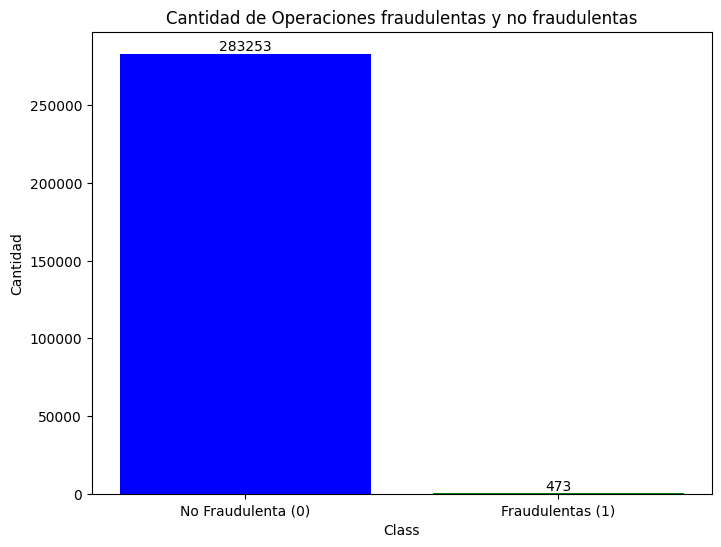

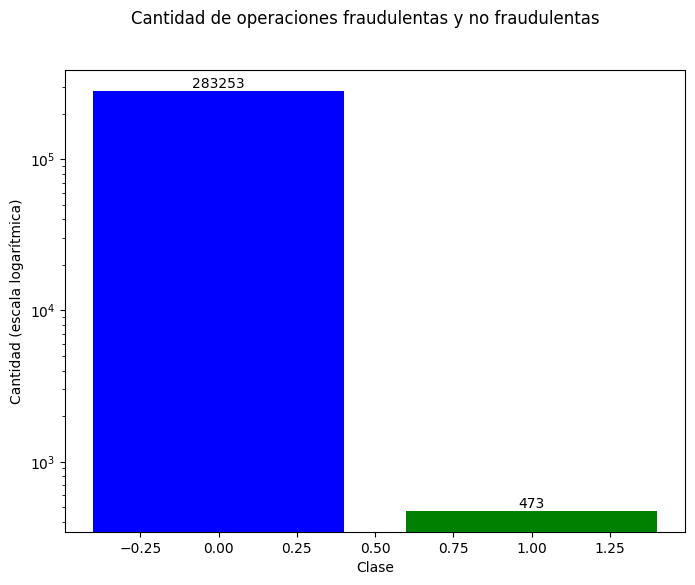

In [11]:
# Cuenta el número de transacciones fraudulentas y no fraudulentes
# trabajaremos con tipo_transacciones creado en pasos anteriores--> tipo_transacciones = df_credit['Class'].value_counts()
#print(tipo_transacciones)

# Crear el gráfico de barras - Haremos un grafico de barras apilado y le pondremos las etiquetas
plt.figure(figsize=(8, 6))
bars=plt.bar(tipo_transacciones.index, tipo_transacciones.values, color=['blue', 'green'])

#añadimos las etiquetas de cantidad a cada una de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')
plt.xlabel('Class')
plt.ylabel('Cantidad')
plt.title('Cantidad de Operaciones fraudulentas y no fraudulentas')
plt.xticks(ticks=[0, 1], labels=['No Fraudulenta (0)', 'Fraudulentas (1)'])
plt.savefig('../charts/fraud_vs_no_fraud.png')
plt.show()



# Crear el gráfico de barras en escala logaritmica para apreciar bien la columna de Fraudulentas
plt.figure(figsize=(8, 6))
plt.bar(tipo_transacciones.index, tipo_transacciones.values, color=['blue', 'green'])

# Usar escala logarítmica
plt.yscale('log')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')
    
plt.xlabel('Clase')
plt.ylabel('Cantidad (escala logarítmica)')
plt.suptitle('Cantidad de operaciones fraudulentas y no fraudulentas')
plt.savefig('../charts/fraud_vs_no_fraud_log.png')
plt.show()


<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>

    Para crear un gráfico de barras que muestre la cantidad de transacciones fraudulentas y no fraudulentas, deberás contar las veces que ocurre cada clase (fraude y no fraude) según la información de la columna «Class» y después representar estos recuentos en un gráfico de barras.
</details>

Pregunta 2: ¿Cuál es la distribución de los importes de las transacciones fraudulentas? (Utiliza un histograma)


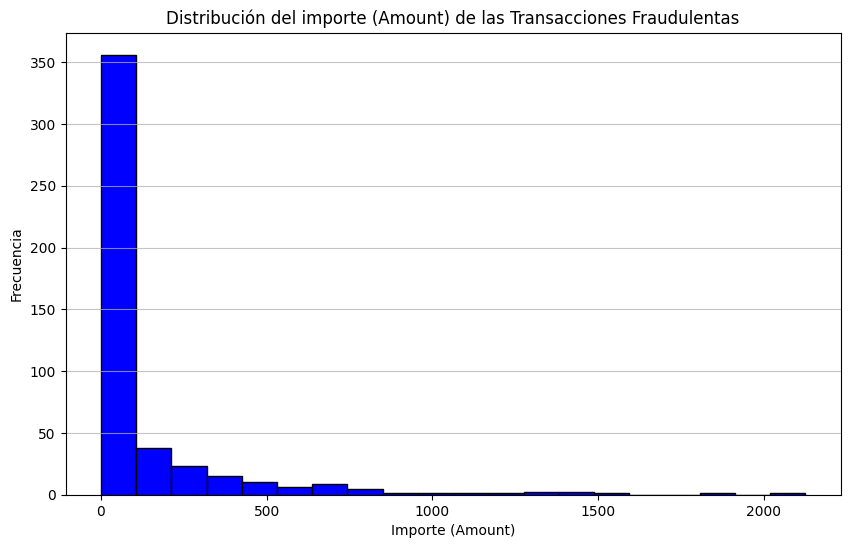

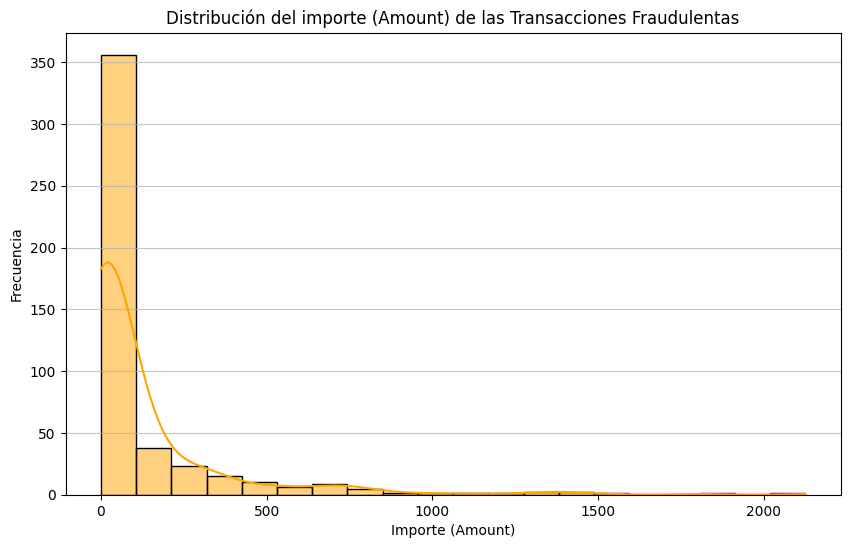

In [12]:
# Separa los datos de transacciones fraudulentas
#creamos un df con solo las de Class==1, que son las fraudulentas
df_fraudulentas=df_credit[df_credit['Class']==1]

# Muestra la distribución de los importes de las transacciones fraudulentas con matplotlib

plt.figure(figsize=(10, 6))
plt.hist(df_fraudulentas['Amount'], bins=20, color='blue', edgecolor='black')  # Ajustaremos el número de bins según sea necesario

plt.title('Distribución del importe (Amount) de las Transacciones Fraudulentas')
plt.xlabel('Importe (Amount)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.savefig('../charts/fraud_amount_distribution.png')
plt.show()


# Muestra la distribución de los importes de las transacciones fraudulentas con Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df_fraudulentas['Amount'], bins=20, color='orange', kde=True)  # kde=True añadimos una curva de densidad

plt.title('Distribución del importe (Amount) de las Transacciones Fraudulentas')
plt.xlabel('Importe (Amount)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.savefig('../charts/fraud_amount_distribution_seaborn.png')
plt.show()



<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>
    
    Para visualizar la distribución de los importes de las transacciones fraudulentas, deberás filtrar el dataset para que contenga únicamente las transacciones fraudulentas (aquellas donde «Class» es igual a 1) y, después, usar un histograma para representar la distribución de los valores de la columna «Amount» de los datos filtrados.
</details>

## Desarrollo y evaluación de modelos

### Separa del dataset

In [13]:
# importamos train_test_split del modulo sklearn.model_selection  
from sklearn.model_selection import train_test_split


# Separa los datos de entrenamiento y evaluación
# en X guardaremos todas las columnas excepto Class y en Y el resto

X = df_credit.drop(columns='Class', axis=1)
Y = df_credit['Class']

# Separamos los datos en grupos de entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

print(f"Total de muestras del dataframe: {X.shape[0]} y un total de {X.shape[1]} caracteristicas (columnas)" )
print(f"Total de muestras de entrenamiento: {X_train.shape[0]} y un total de {X_train.shape[1]} caracteristicas (columnas)")
print(f"Total de muestras de Test: {X_test.shape[0]} y un total de {X_test.shape[1]} caracteristicas (columnas)")

Total de muestras del dataframe: 283726 y un total de 30 caracteristicas (columnas)
Total de muestras de entrenamiento: 226980 y un total de 30 caracteristicas (columnas)
Total de muestras de Test: 56746 y un total de 30 caracteristicas (columnas)


<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Una vez que tegas este dataset, puedes utilizar la biblioteca scikit-learn para separar los datos en grupos de entrenamiento y de evaluación con la función train_test_split().

Primero, puedes crear un dataframe de pandas «X» con todas las columnas excepto la columna «Class». Puedes crear una serie de pandas «y» solamente con la clumna «Class» column.

A continuación, pueder usar la función train_test_split() para separar los datos en grupos de entrenamiento y de evaluación. Puedes pasar las variables X e Y como argumentos junto con el argumento test_size para especificar el porcentaje del dataset que se deberá asignar al grupo de evaluación (en este caso, el 20 %). También puedes utilizar el argumento random_state para determinar un valor fijo de tal manera que, cada vez que se ejecute el código, se produzca la misma división.

La función train_test_split() devuelve cuatro variables: X_train, X_test, y_train y y_test. X_train e y_train representan el grupo de entrenamiento, minetras que X_test e y_test representan el grupo de evaluación. Puedes utilizar estas variable para entrenar y evaluar tus modelos de aprendizaje automático.

Ten en cuenta que es importante dividir los datos en grupos de entrenamiento y de evaluación para evitar el sobreajuste y permitir que se evalúe el rendimiento del modelo con datos que desconoce.

```



</details>

### Crea y evalúa los modelos

In [14]:
# importamos RandomForestClassifier del módulo sklearn.esemble
# importamos classification_report y accuracy_score del modulo sklearn.metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

#Creamos la instancia de RandomForestClassifier y entrenamos el modelo con los datos de entrenamiento
modelo= RandomForestClassifier(max_depth=150, random_state=42)
modelo.fit(X_train, Y_train)

#Evaluamos el modelo con datos de entrenamiento e imprimimos métricas
Y_train_pred = modelo.predict(X_train)
print("Evaluación con datos de entrenamiento:")
print(classification_report(Y_train, Y_train_pred))
print(f"Exactitud del modelo con datos de entrenamiento: {accuracy_score(Y_train, Y_train_pred) * 100:.2f}%\n")


#Evaluamos el modelo con los datos de test
Y_test_pred = modelo.predict(X_test)
print("Evaluación con datos de prueba:")
print(classification_report(Y_test, Y_test_pred))
print(f"Exactitud del modelo con datos de prueba: {accuracy_score(Y_test, Y_test_pred) * 100:.2f}%")

Evaluación con datos de entrenamiento:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226602
           1       1.00      1.00      1.00       378

    accuracy                           1.00    226980
   macro avg       1.00      1.00      1.00    226980
weighted avg       1.00      1.00      1.00    226980

Exactitud del modelo con datos de entrenamiento: 100.00%

Evaluación con datos de prueba:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.93      0.75      0.83        95

    accuracy                           1.00     56746
   macro avg       0.97      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746

Exactitud del modelo con datos de prueba: 99.95%


<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Debes haber importado las bibliotecas y clases necesarias, tales como la clase RandomForestClassifier de scikit-learn y las funciones classification_report() y accuracy_score() functions del módulo sklearn.metrics.

Una vez hayas hecho esto, podrás crear una instancia de la clase RandomForestClassifier configurando los hiperparámetros max_depth y random_state en 150 y 42, respectivamente. Puedes utilizar el método .fit() para entrenar el modelo con los datos de entrenamiento.

A continuación, puedes utilizar el modelo entrenado para hacer predicciones sobre los datos de evaluación con el método .predict(). Puedes almacenar estas predicciones en una variable llamada y_pred.

Después, puedes utilizar la función classification_report() para mostrar en la pantalla un resumen del rendimiento del modelo con los datos de entrenamiento. Esto incluirá métricos tales como la precisión (precission), la exhaustividad (recall) y la puntuación F1 (f1-score) para cada una de las clases (en este caso, si una transacción es fraudulenta o normal). También puedes utilizar la función accuracy_score() para calcular la exactitud general del modelo con los datos de evaluación.

Finalmente, podrás mostrar la exactitud el modelo en forma de porcentaje; utiliza el operador *100 para multiplicar la puntuación de exactitud por 100.

```



</details>

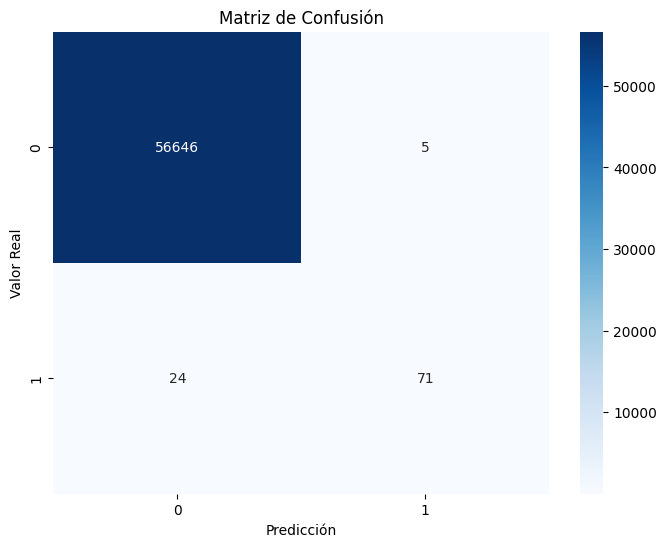

Verdaderos Negativos (transacciones NO FRAUDULENTAS y clasificadas como NO FRAUDULENTAS): 56646
Falsos Positivos (transacciones NO FRAUDULENTAS y clasificadas como FRAUDULENTAS): 5
Falsos Negativos (transacciones FRAUDULENTAS las cuales se clasificaron como NO FRAUDULENTAS): 24
Verdaderos Positivos (transacciones FRAUDULENTAS las cuales se clasificaron como FRAUDULENTAS: 71


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Matriz de confusión para los datos de prueba
matrix_conf = confusion_matrix(Y_test, Y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(matrix_conf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.savefig('../charts/confusion_matrix.png')
plt.show()


#asignamos los valores obtenidos para la explicación de la matriz
verdaderos_negativos = matrix_conf[0, 0]
falsos_positivos = matrix_conf[0, 1]
falsos_negativos = matrix_conf[1, 0]
verdaderos_positivos = matrix_conf[1, 1]

# Imprimimos la explicación
print(f"Verdaderos Negativos (transacciones NO FRAUDULENTAS y clasificadas como NO FRAUDULENTAS): {verdaderos_negativos}")
print(f"Falsos Positivos (transacciones NO FRAUDULENTAS y clasificadas como FRAUDULENTAS): {falsos_positivos}")
print(f"Falsos Negativos (transacciones FRAUDULENTAS las cuales se clasificaron como NO FRAUDULENTAS): {falsos_negativos}")
print(f"Verdaderos Positivos (transacciones FRAUDULENTAS las cuales se clasificaron como FRAUDULENTAS: {verdaderos_positivos}")
